In [1]:
import cv2
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from math import sqrt
import cython

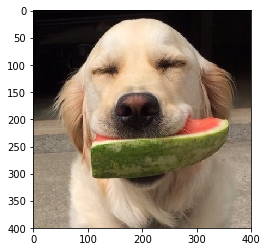

In [2]:
img = cv2.imread('dog.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# Quantização de cores: Método Uniforme

### Funções auxiliares

In [3]:
def primes(n):
    primfac = []
    d = 2
    while d*d <= n:
        while (n % d) == 0:
            primfac.append(d)
            n //= d
        d += 1
    if n > 1:
        primfac.append(n)
    return primfac

def primes_reduction(primes, n):
    factor = 1
    while len(primes) > n-1:
        factor *= primes.pop(0)
    primes.append(factor)
    return primes

def min_distance(pixel, cartesian):
    min = None
    min_array = []
    for c in cartesian:
        dist = np.linalg.norm(pixel-c)
        if min == None or dist < min:
            min = dist
            min_array = c
    return min_array        

In [4]:
n = 12
primes_list = primes_reduction(primes(n), 3)
a = np.linspace(0, 255, primes_list[0], dtype=int)
b = np.linspace(0, 255, primes_list[1], dtype=int)
c = np.linspace(0, 255, primes_list[2], dtype=int)

cartesian = np.array(np.meshgrid(a, b, c)).T.reshape(-1,3)
cartesian

array([[  0,   0,   0],
       [  0, 127,   0],
       [  0, 255,   0],
       [255,   0,   0],
       [255, 127,   0],
       [255, 255,   0],
       [  0,   0, 255],
       [  0, 127, 255],
       [  0, 255, 255],
       [255,   0, 255],
       [255, 127, 255],
       [255, 255, 255]])

In [5]:
def quant_uniforme(image, cartesian):
    newimage = image.copy()
    h = image.shape[0]
    w = image.shape[1]
    for y in range(h):
        for x in range(w):
            newimage[y, x] = min_distance(image[y, x], cartesian)
    return newimage

In [6]:
img_uniforme = quant_uniforme(img, cartesian)

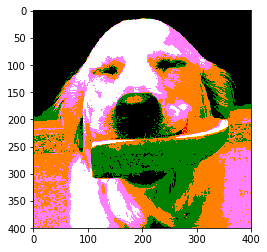

In [7]:
plt.imshow(cv2.cvtColor(img_uniforme, cv2.COLOR_BGR2RGB))

# Quantização de cores: Método Corte Mediano

In [32]:
# Primeira coisa é achar a componente de cores com maior contraste
b = abs(img[:,:,0].max() - img[:,:,0].min())
g = abs(img[:,:,1].max() - img[:,:,1].min())
r = abs(img[:,:,2].max() - img[:,:,2].min())

# img[:,:,0]

hist, bins = np.histogram(img[:,:,0], bins=range(256))
print(np.median(hist))
hist

579.0


array([  91,   40,   98,  247,  929, 2462, 5355, 4796, 4115, 2848, 2149,
       1745, 1329, 1120, 1060,  995, 1162, 1163, 1021,  895,  749,  720,
        661,  612,  645,  616,  604,  650,  700,  730,  683,  708,  634,
        611,  610,  618,  593,  592,  660,  632,  630,  628,  632,  696,
        650,  689,  672,  689,  702,  652,  688,  624,  648,  636,  621,
        636,  583,  593,  608,  656,  646,  665,  640,  673,  615,  597,
        580,  534,  529,  521,  452,  446,  433,  455,  422,  400,  400,
        420,  404,  459,  452,  467,  478,  536,  517,  528,  506,  527,
        565,  573,  558,  581,  595,  554,  547,  552,  521,  544,  576,
        608,  584,  643,  661,  693,  712,  766,  738,  818,  893,  959,
        918,  983,  938, 1014, 1148, 1201, 1252, 1277, 1320, 1296, 1275,
       1234, 1267, 1237, 1116, 1140, 1118, 1135, 1141, 1127, 1043, 1130,
       1083, 1015,  957,  848,  939,  886,  784,  805,  751,  688,  698,
        630,  632,  611,  582,  594,  570,  527,  5

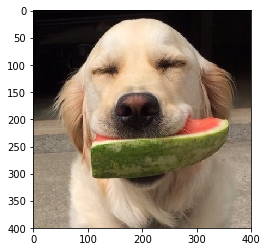

In [21]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))